In [1]:
import pandas as pd

In [49]:
df_book = pd.read_csv('book_data.csv', index_col=[0])
df_book.head()

,date,preco,tipo,ativo,exchange,vol,logo_url,valor_total
0,2021-07-23T00:00:00,123,Compra,ITUB4,BMFBOVESPA,10000,https://logo.clearbit.com/itau.com.br,500
1,2017-02-02T00:00:00,123,Compra,MGLU3,BMFBOVESPA,7500,https://logo.clearbit.com/magazineluiza.com.br,500
2,2022-02-02T00:00:00,123,Compra,TTEN3,BMFBOVESPA,15000,https://logo.clearbit.com/ri.3tentos.com.br,500
3,2018-02-02T00:00:00,123,Compra,VALE3,BMFBOVESPA,29000,https://logo.clearbit.com/vale.com.br,500
4,2019-02-02T00:00:00,123,Compra,LREN3,BMFBOVESPA,50000,https://logo.clearbit.com/lojasrenner.com.br,500


In [50]:
df_book['datetime'] = pd.to_datetime(df_book['date'], format='%Y-%m-%d %H:%M:%S')

In [51]:
df_book

,date,preco,tipo,ativo,exchange,vol,logo_url,valor_total,datetime
0,2021-07-23T00:00:00,123,Compra,ITUB4,BMFBOVESPA,10000,https://logo.clearbit.com/itau.com.br,500,2021-07-23
1,2017-02-02T00:00:00,123,Compra,MGLU3,BMFBOVESPA,7500,https://logo.clearbit.com/magazineluiza.com.br,500,2017-02-02
2,2022-02-02T00:00:00,123,Compra,TTEN3,BMFBOVESPA,15000,https://logo.clearbit.com/ri.3tentos.com.br,500,2022-02-02
3,2018-02-02T00:00:00,123,Compra,VALE3,BMFBOVESPA,29000,https://logo.clearbit.com/vale.com.br,500,2018-02-02
4,2019-02-02T00:00:00,123,Compra,LREN3,BMFBOVESPA,50000,https://logo.clearbit.com/lojasrenner.com.br,500,2019-02-02
5,2022-07-22T00:00:00,123,Venda,ITUB4,BMFBOVESPA,5000,https://logo.clearbit.com/itau.com.br,500,2022-07-22
6,2019-07-22T00:00:00,123,Venda,MGLU3,BMFBOVESPA,2000,https://logo.clearbit.com/magazineluiza.com.br,500,2019-07-22
7,2020-07-22T00:00:00,123,Venda,LREN3,BMFBOVESPA,28000,https://logo.clearbit.com/lojasrenner.com.br,500,2020-07-22


In [3]:
df_hist = pd.read_csv('historical_data.csv', index_col=[0])
df_hist.head()

,datetime,symbol,close
0,2002-11-29 09:00:00,BMFBOVESPA:ITUB4,0.391348
1,2002-12-02 09:00:00,BMFBOVESPA:ITUB4,0.402449
2,2002-12-03 09:00:00,BMFBOVESPA:ITUB4,0.395973
3,2002-12-04 09:00:00,BMFBOVESPA:ITUB4,0.395973
4,2002-12-05 09:00:00,BMFBOVESPA:ITUB4,0.384872


In [4]:
df_hist['datetime'] = pd.to_datetime(df_hist['datetime'])

In [5]:
df_hist = df_hist.set_index('datetime')

In [6]:
df_hist['date'] = df_hist.index.date

In [7]:
df_hist

,symbol,close,date
datetime,,,
2002-11-29 09:00:00,BMFBOVESPA:ITUB4,0.391348,2002-11-29
2002-12-02 09:00:00,BMFBOVESPA:ITUB4,0.402449,2002-12-02
2002-12-03 09:00:00,BMFBOVESPA:ITUB4,0.395973,2002-12-03
2002-12-04 09:00:00,BMFBOVESPA:ITUB4,0.395973,2002-12-04
2002-12-05 09:00:00,BMFBOVESPA:ITUB4,0.384872,2002-12-05
...,...,...,...
2023-02-15 09:00:00,VANTAGE:BVSPX,107801.570000,2023-02-15
2023-02-16 09:00:00,VANTAGE:BVSPX,108483.120000,2023-02-16
2023-02-17 09:00:00,VANTAGE:BVSPX,107192.340000,2023-02-17


In [8]:
df_hist = df_hist.groupby(['date', 'symbol'])['close'].last().to_frame().reset_index()

In [9]:
df_hist = df_hist.pivot(values='close', columns='symbol', index='date')

In [10]:
df_hist

symbol,BMFBOVESPA:ITUB4,BMFBOVESPA:LREN3,BMFBOVESPA:MGLU3,BMFBOVESPA:TTEN3,BMFBOVESPA:VALE3,VANTAGE:BVSPX
date,,,,,,
2002-11-29,0.391348,NaN,NaN,NaN,1.381827,NaN
2002-12-02,0.402449,NaN,NaN,NaN,1.402554,NaN
2002-12-03,0.395973,NaN,NaN,NaN,1.409463,NaN
2002-12-04,0.395973,NaN,NaN,NaN,1.402554,NaN
2002-12-05,0.384872,NaN,NaN,NaN,1.423143,NaN
...,...,...,...,...,...,...
2023-02-15,26.770000,19.230000,3.89,12.75,89.000000,107801.57
2023-02-16,26.969999,19.379999,3.81,12.77,89.190002,108483.12
2023-02-17,26.879999,19.620001,3.66,12.62,88.029999,107192.34


In [11]:
df_cotacoes = df_hist.copy()

In [12]:
import numpy as np

In [13]:
df_cotacoes = df_cotacoes.replace({0: np.nan}).ffill().fillna(0)

In [14]:
df_carteira = df_hist.copy()

In [15]:
df_carteira.columns = [col.split(':')[-1] for col in df_carteira.columns]

In [16]:
df_cotacoes.columns = [col.split(':')[-1] for col in df_cotacoes.columns]

In [17]:
del df_carteira['BVSPX'], df_cotacoes['BVSPX']

In [18]:
df_book['vol'] = df_book['vol'] * df_book['tipo'].replace({'Compra': 1, 'Venda': -1})

In [19]:
df_book['date'] = pd.to_datetime(df_book.date)

In [20]:
df_book

,date,preco,tipo,ativo,exchange,vol,logo_url,valor_total
0,2021-07-23,123,Compra,ITUB4,BMFBOVESPA,10000,https://logo.clearbit.com/itau.com.br,500
1,2017-02-02,123,Compra,MGLU3,BMFBOVESPA,7500,https://logo.clearbit.com/magazineluiza.com.br,500
2,2022-02-02,123,Compra,TTEN3,BMFBOVESPA,15000,https://logo.clearbit.com/ri.3tentos.com.br,500
3,2018-02-02,123,Compra,VALE3,BMFBOVESPA,29000,https://logo.clearbit.com/vale.com.br,500
4,2019-02-02,123,Compra,LREN3,BMFBOVESPA,50000,https://logo.clearbit.com/lojasrenner.com.br,500
5,2022-07-22,123,Venda,ITUB4,BMFBOVESPA,-5000,https://logo.clearbit.com/itau.com.br,500
6,2019-07-22,123,Venda,MGLU3,BMFBOVESPA,-2000,https://logo.clearbit.com/magazineluiza.com.br,500
7,2020-07-22,123,Venda,LREN3,BMFBOVESPA,-28000,https://logo.clearbit.com/lojasrenner.com.br,500


In [21]:
df_book.index = df_book['date'] 

In [22]:
df_book['date'] = df_book.index.date

In [23]:
df_carteira.iloc[:, :] = 0

In [24]:
df_carteira

,ITUB4,LREN3,MGLU3,TTEN3,VALE3
date,,,,,
2002-11-29,0,0,0,0,0
2002-12-02,0,0,0,0,0
2002-12-03,0,0,0,0,0
2002-12-04,0,0,0,0,0
2002-12-05,0,0,0,0,0
...,...,...,...,...,...
2023-02-15,0,0,0,0,0
2023-02-16,0,0,0,0,0
2023-02-17,0,0,0,0,0


In [25]:
for _, row in df_book.iterrows():
    df_carteira.loc[df_carteira.index >= row['date'], row['ativo']] += row['vol']

In [26]:
df_carteira

,ITUB4,LREN3,MGLU3,TTEN3,VALE3
date,,,,,
2002-11-29,0,0,0,0,0
2002-12-02,0,0,0,0,0
2002-12-03,0,0,0,0,0
2002-12-04,0,0,0,0,0
2002-12-05,0,0,0,0,0
...,...,...,...,...,...
2023-02-15,5000,22000,5500,15000,29000
2023-02-16,5000,22000,5500,15000,29000
2023-02-17,5000,22000,5500,15000,29000


In [27]:
df_patrimonio = df_cotacoes * df_carteira

In [28]:
df_patrimonio

,ITUB4,LREN3,MGLU3,TTEN3,VALE3
date,,,,,
2002-11-29,0.000,0.000,0.0,0.0,0.000
2002-12-02,0.000,0.000,0.0,0.0,0.000
2002-12-03,0.000,0.000,0.0,0.0,0.000
2002-12-04,0.000,0.000,0.0,0.0,0.000
2002-12-05,0.000,0.000,0.0,0.0,0.000
...,...,...,...,...,...
2023-02-15,133850.000,423060.000,21395.0,191250.0,2581000.000
2023-02-16,134849.995,426359.978,20955.0,191550.0,2586510.058
2023-02-17,134399.995,431640.022,20130.0,189300.0,2552869.971


In [29]:
df_patrimonio = df_patrimonio.fillna(0)

In [30]:
df_patrimonio['soma'] = df_patrimonio.sum(axis=1)

In [31]:
df_patrimonio

,ITUB4,LREN3,MGLU3,TTEN3,VALE3,soma
date,,,,,,
2002-11-29,0.000,0.000,0.0,0.0,0.000,0.000
2002-12-02,0.000,0.000,0.0,0.0,0.000,0.000
2002-12-03,0.000,0.000,0.0,0.0,0.000,0.000
2002-12-04,0.000,0.000,0.0,0.0,0.000,0.000
2002-12-05,0.000,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...
2023-02-15,133850.000,423060.000,21395.0,191250.0,2581000.000,3350555.000
2023-02-16,134849.995,426359.978,20955.0,191550.0,2586510.058,3360225.031
2023-02-17,134399.995,431640.022,20130.0,189300.0,2552869.971,3328339.988


In [32]:
df_ops = df_carteira - df_carteira.shift(1)

In [33]:
df_ops.loc[df_ops['ITUB4'] != 0, 'ITUB4']

date
2002-11-29        NaN
2021-07-23    10000.0
2022-07-22    -5000.0
Name: ITUB4, dtype: float64

In [34]:
df_ops = df_ops * df_cotacoes

In [35]:
df_patrimonio['evolucao_patrimonial'] = df_patrimonio['soma'].diff() - df_ops.sum(axis=1)

<AxesSubplot:xlabel='date'>

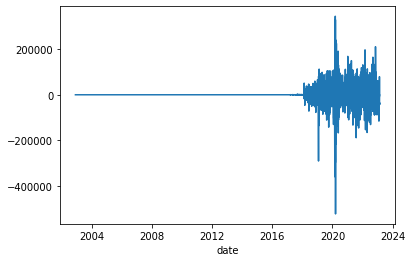

In [36]:
df_patrimonio['evolucao_patrimonial'].plot()

In [37]:
df_patrimonio['evolucao_patrimonial'].max()

343818.53069499973

In [38]:
df_patrimonio[df_patrimonio['evolucao_patrimonial'] == df_patrimonio['evolucao_patrimonial'].min()]

,ITUB4,LREN3,MGLU3,TTEN3,VALE3,soma,evolucao_patrimonial
date,,,,,,,
2020-03-16,0.0,1.595940e+06,46710.713115,0.0,844082.90967,2.486734e+06,-521643.166575


<AxesSubplot:xlabel='date'>

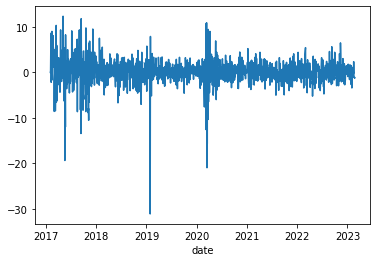

In [39]:
(df_patrimonio['evolucao_patrimonial'] / df_patrimonio['soma'] * 100).plot()

In [40]:
df_patrimonio['evolucao_percentual'] = (df_patrimonio['evolucao_patrimonial'] / df_patrimonio['soma'])

In [41]:
ev_total_list = [1]*len(df_patrimonio)

In [42]:
df_patrimonio['evolucao_percentual'] = df_patrimonio['evolucao_percentual'].fillna(0)

In [43]:
for i, x in enumerate(df_patrimonio['evolucao_percentual'].to_list()[1:]):
    ev_total_list[i+1] = ev_total_list[i] * (1 + x)

In [44]:
df_patrimonio['evolucao_cum'] = ev_total_list

<AxesSubplot:xlabel='date'>

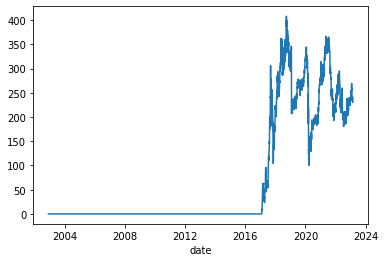

In [45]:
((df_patrimonio['evolucao_cum'] - 1) * 100).plot()

In [46]:
df_patrimonio

,ITUB4,LREN3,MGLU3,TTEN3,VALE3,soma,evolucao_patrimonial,evolucao_percentual,evolucao_cum
date,,,,,,,,,
2002-11-29,0.000,0.000,0.0,0.0,0.000,0.000,NaN,0.000000,1.000000
2002-12-02,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000000,1.000000
2002-12-03,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000000,1.000000
2002-12-04,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000000,1.000000
2002-12-05,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2023-02-15,133850.000,423060.000,21395.0,191250.0,2581000.000,3350555.000,79112.470,0.023612,3.408182
2023-02-16,134849.995,426359.978,20955.0,191550.0,2586510.058,3360225.031,9670.031,0.002878,3.417990
2023-02-17,134399.995,431640.022,20130.0,189300.0,2552869.971,3328339.988,-31885.043,-0.009580,3.385246


In [54]:
df_patrimonio['evolucao_cum'][-1]

3.3032548953236036